In [76]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [3]:
train_df=pd.read_csv('employee_train.csv')
test_df=pd.read_csv('employee_test.csv')

In [4]:
train_df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
test_df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,44931,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,44931,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [6]:
train_df.shape

(1042, 28)

In [7]:
test_df.shape

(210, 27)

In [8]:
train_df.drop(['S.No','Gender','Timestamp',
'Country',
'state',
'self_employed',
'no_employees',
'comments'],inplace=True,axis=1)

In [9]:
train_df.shape

(1042, 20)

In [10]:
test_df.drop(['S.No','Gender','Timestamp',
'Country',
'state',
'self_employed',
'no_employees',
'comments'],inplace=True,axis=1)

In [11]:
train_df.columns

Index(['Age', 'family_history', 'treatment', 'work_interfere', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [12]:
train_df.isna().sum()

Age                            0
family_history                 0
treatment                      0
work_interfere               234
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [13]:
test_df.isna().sum()

Age                           0
family_history                0
work_interfere               28
remote_work                   0
tech_company                  0
benefits                      3
care_options                  0
wellness_program              2
seek_help                     0
anonymity                     0
leave                         5
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [14]:
for i in train_df.columns:
    train_df[i]=train_df[i].fillna(train_df[i].mode()[0])
    if i!='treatment':
        test_df[i]=test_df[i].fillna(test_df[i].mode()[0])

In [15]:
for i in train_df.drop(['Age'],axis=1).columns:
    print(train_df[i].value_counts())


No     639
Yes    403
Name: family_history, dtype: int64
No     534
Yes    508
Name: treatment, dtype: int64
Sometimes    619
Never        178
Rarely       144
Often        101
Name: work_interfere, dtype: int64
No     730
Yes    312
Name: remote_work, dtype: int64
Yes    866
No     176
Name: tech_company, dtype: int64
Yes           410
Don't know    328
No            304
Name: benefits, dtype: int64
No          420
Yes         360
Not sure    262
Name: care_options, dtype: int64
No            692
Yes           192
Don't know    158
Name: wellness_program, dtype: int64
No            530
Don't know    309
Yes           203
Name: seek_help, dtype: int64
Don't know    681
Yes           310
No             51
Name: anonymity, dtype: int64
Don't know            464
Somewhat easy         217
Very easy             175
Somewhat difficult    106
Very difficult         80
Name: leave, dtype: int64
No       422
Maybe    379
Yes      241
Name: mental_health_consequence, dtype: int64
No       769
Ma

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [17]:
low_leadtime,high_leadtime=remove_outlier(train_df['Age'])
train_df['Age']=np.where(train_df['Age']>high_leadtime,high_leadtime,train_df['Age'])
train_df['Age']=np.where(train_df['Age']<low_leadtime,low_leadtime,train_df['Age'])

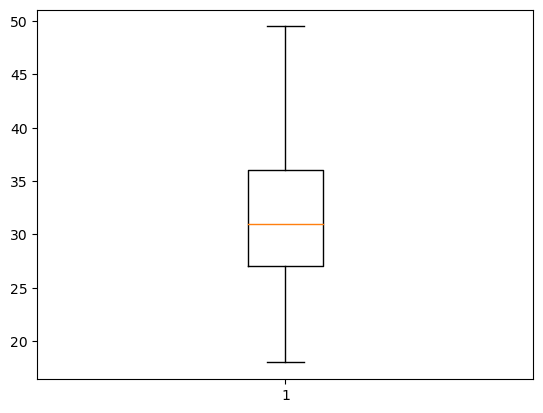

In [18]:
plt.boxplot(train_df['Age'])
plt.show()

In [19]:
le=LabelEncoder()
for i in train_df.drop(['Age'],axis=1).columns:
    train_df[i]=le.fit_transform(train_df[i])
    if i!='treatment':
        test_df[i]=le.transform(test_df[i])

In [20]:
train_df.head()

,Age,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,0,1,1,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44.0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32.0,0,0,2,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31.0,1,1,1,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31.0,0,0,0,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [21]:
test_df.head()

,Age,family_history,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,39,1,3,1,1,1,2,2,2,2,1,1,1,2,2,1,0,2,1
1,26,1,3,0,1,2,2,1,1,0,0,1,1,1,2,1,0,1,1
2,23,1,3,0,0,1,0,1,1,0,1,2,1,0,1,1,0,1,0
3,35,1,1,0,1,0,1,1,1,2,4,1,1,1,1,1,0,1,0
4,36,0,0,1,1,0,1,0,0,0,4,1,1,1,1,1,1,0,0


In [22]:
x=train_df.drop(['treatment'],axis=1)
y=train_df['treatment']

In [23]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x,y)

In [24]:
test_df=std.transform(test_df)

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [26]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

In [27]:
log=LogisticRegression()
log.fit(xtrain,ytrain)
pred_train_log=log.predict(xtrain)
report(ytrain,pred_train_log)
pred_test_log=log.predict(xtest)
report(ytest,pred_test_log)

Accuracy of model is 72.51 %

  [[322 105]
 [124 282]]

               precision    recall  f1-score   support

           0       0.72      0.75      0.74       427
           1       0.73      0.69      0.71       406

    accuracy                           0.73       833
   macro avg       0.73      0.72      0.72       833
weighted avg       0.73      0.73      0.72       833

Accuracy of model is 70.81 %

  [[82 25]
 [36 66]]

               precision    recall  f1-score   support

           0       0.69      0.77      0.73       107
           1       0.73      0.65      0.68       102

    accuracy                           0.71       209
   macro avg       0.71      0.71      0.71       209
weighted avg       0.71      0.71      0.71       209



In [38]:
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(xtrain,ytrain)
pred_train_dtree=dtree.predict(xtrain)
report(ytrain,pred_train_dtree)
pred_test_dtree=dtree.predict(xtest)
report(ytest,pred_test_dtree)

Accuracy of model is 70.83 %

  [[355  72]
 [171 235]]

               precision    recall  f1-score   support

           0       0.67      0.83      0.75       427
           1       0.77      0.58      0.66       406

    accuracy                           0.71       833
   macro avg       0.72      0.71      0.70       833
weighted avg       0.72      0.71      0.70       833

Accuracy of model is 69.38 %

  [[94 13]
 [51 51]]

               precision    recall  f1-score   support

           0       0.65      0.88      0.75       107
           1       0.80      0.50      0.61       102

    accuracy                           0.69       209
   macro avg       0.72      0.69      0.68       209
weighted avg       0.72      0.69      0.68       209



In [71]:
rf=RandomForestClassifier(n_estimators=40,max_depth=3)
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
report(ytrain,pred_train_rf)
pred_test_rf=rf.predict(xtest)
report(ytest,pred_test_rf)

Accuracy of model is 75.87 %

  [[335  92]
 [109 297]]

               precision    recall  f1-score   support

           0       0.75      0.78      0.77       427
           1       0.76      0.73      0.75       406

    accuracy                           0.76       833
   macro avg       0.76      0.76      0.76       833
weighted avg       0.76      0.76      0.76       833

Accuracy of model is 76.08 %

  [[90 17]
 [33 69]]

               precision    recall  f1-score   support

           0       0.73      0.84      0.78       107
           1       0.80      0.68      0.73       102

    accuracy                           0.76       209
   macro avg       0.77      0.76      0.76       209
weighted avg       0.77      0.76      0.76       209



In [87]:
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

forest_params = [{'max_depth': list(range(2, 20)),'n_estimators':list(range(2,190)),'min_samples_split':list(range(2,10)),'min_samples_leaf':list(range(2,10)),'random_state':list(range(2,50))}]
clf = GridSearchCV(rfc, forest_params, cv = 2, scoring='accuracy')

clf.fit(xtrain, ytrain)
print(clf.best_params_)
print(clf.best_score_)

KeyboardInterrupt: 

In [67]:
ada=AdaBoostClassifier(n_estimators=3,learning_rate=0.6,)
ada.fit(xtrain,ytrain)
pred_train_ada=ada.predict(xtrain)
report(ytrain,pred_train_ada)
pred_test_ada=ada.predict(xtest)
report(ytest,pred_test_ada)

Accuracy of model is 73.59 %

  [[305 122]
 [ 98 308]]

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       427
           1       0.72      0.76      0.74       406

    accuracy                           0.74       833
   macro avg       0.74      0.74      0.74       833
weighted avg       0.74      0.74      0.74       833

Accuracy of model is 77.03 %

  [[86 21]
 [27 75]]

               precision    recall  f1-score   support

           0       0.76      0.80      0.78       107
           1       0.78      0.74      0.76       102

    accuracy                           0.77       209
   macro avg       0.77      0.77      0.77       209
weighted avg       0.77      0.77      0.77       209



In [41]:
gb=GradientBoostingClassifier(max_depth=2)
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
report(ytrain,pred_train_gb)
pred_test_gb=gb.predict(xtest)
report(ytest,pred_test_gb)

Accuracy of model is 80.67 %

  [[348  79]
 [ 82 324]]

               precision    recall  f1-score   support

           0       0.81      0.81      0.81       427
           1       0.80      0.80      0.80       406

    accuracy                           0.81       833
   macro avg       0.81      0.81      0.81       833
weighted avg       0.81      0.81      0.81       833

Accuracy of model is 74.16 %

  [[83 24]
 [30 72]]

               precision    recall  f1-score   support

           0       0.73      0.78      0.75       107
           1       0.75      0.71      0.73       102

    accuracy                           0.74       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.74      0.74      0.74       209



In [32]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
pred_train_gnb=gnb.predict(xtrain)
report(ytrain,pred_train_gnb)
pred_test_gnb=gnb.predict(xtest)
report(ytest,pred_test_gnb)

Accuracy of model is 70.95 %

  [[325 102]
 [140 266]]

               precision    recall  f1-score   support

           0       0.70      0.76      0.73       427
           1       0.72      0.66      0.69       406

    accuracy                           0.71       833
   macro avg       0.71      0.71      0.71       833
weighted avg       0.71      0.71      0.71       833

Accuracy of model is 71.29 %

  [[81 26]
 [34 68]]

               precision    recall  f1-score   support

           0       0.70      0.76      0.73       107
           1       0.72      0.67      0.69       102

    accuracy                           0.71       209
   macro avg       0.71      0.71      0.71       209
weighted avg       0.71      0.71      0.71       209



In [33]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
pred_train_xgb=xgb.predict(xtrain)
report(ytrain,pred_train_xgb)
pred_test_xgb=xgb.predict(xtest)
report(ytest,pred_test_xgb)

Accuracy of model is 100.0 %

  [[427   0]
 [  0 406]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       406

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833

Accuracy of model is 68.42 %

  [[81 26]
 [40 62]]

               precision    recall  f1-score   support

           0       0.67      0.76      0.71       107
           1       0.70      0.61      0.65       102

    accuracy                           0.68       209
   macro avg       0.69      0.68      0.68       209
weighted avg       0.69      0.68      0.68       209



In [56]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_train_svc=svc.predict(xtrain)
pred_test_svc=svc.predict(xtest)
report(ytrain,pred_train_svc)
report(ytest,pred_test_svc)

Accuracy of model is 81.99 %

  [[356  71]
 [ 79 327]]

               precision    recall  f1-score   support

           0       0.82      0.83      0.83       427
           1       0.82      0.81      0.81       406

    accuracy                           0.82       833
   macro avg       0.82      0.82      0.82       833
weighted avg       0.82      0.82      0.82       833

Accuracy of model is 71.77 %

  [[82 25]
 [34 68]]

               precision    recall  f1-score   support

           0       0.71      0.77      0.74       107
           1       0.73      0.67      0.70       102

    accuracy                           0.72       209
   macro avg       0.72      0.72      0.72       209
weighted avg       0.72      0.72      0.72       209



In [59]:
pred=rf.predict(test_df)

In [60]:
pred.shape

(210,)

In [61]:
predicted=pd.DataFrame()
predicted['S.No']=pd.Series(i for i in range(1,211)) 

In [62]:
predicted['treatment']=pred

In [63]:
predicted['treatment']=predicted['treatment'].map({1:'Yes',0:'No'})

In [64]:
predicted

,S.No,treatment
0,1,Yes
1,2,Yes
2,3,Yes
3,4,Yes
4,5,No
...,...,...
205,206,No
206,207,Yes
207,208,Yes
208,209,Yes


In [65]:
predicted.to_csv('submissionrf.csv',index=False)